In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models
canv = ROOT.TCanvas("canv","canv",900,450)

Welcome to JupyROOT 6.20/06


In [2]:
import numpy as np
from   scipy.fftpack import  fft,  ifft
from   scipy.fftpack import rfft, irfft
from   scipy.stats   import norm, chi2, beta
from math import pow, sqrt, atan, pi

In [3]:
N_EVENTS       = 10
N_CHANNELS     = 2692
BAN_LEVEL      = 65

In [4]:
dumpfile = open("dump.txt","r")
max_diff  = []
down_diff = []
ban_list  = []
ev_num    = 0
for line in dumpfile:
    value_str_list = (line[:-1]).split(",")
    value_list = []
    for idx in range(N_CHANNELS):
        value_list.append( float( value_str_list[idx] ) )
    max_level = max( sum(value_list)/len(value_list) - min(value_list) ,
                    max(value_list) - sum(value_list)/len(value_list) )
    max_diff .append ( max_level )
    if  sum(value_list)/len(value_list) - min(value_list) > max(value_list) - sum(value_list)/len(value_list)   :
        down_diff.append ( sum(value_list)/len(value_list) - min(value_list)  )
    if max_level > BAN_LEVEL:
        ban_list.append( ev_num )
    ev_num = ev_num + 1
dumpfile.close()

In [5]:
dumpfile = open("dump.txt","r")
ev_num = 0
dataset = []
events = 0
for line in dumpfile:
    if ev_num not in ban_list :
        value_str_list = (line[:-1]).split(",")
        value_list = []
        for idx in range(N_CHANNELS):
            value_list.append( float( value_str_list[idx] ) )
        dataset .append( np.array( value_list ) )
        events   = events + 1
    ev_num = ev_num + 1
dumpfile.close()

In [6]:
fftset  = []
print("Performing fast Fourier transformation")
for event in dataset:
    fftset .append(  fft( event ) )

Performing fast Fourier transformation


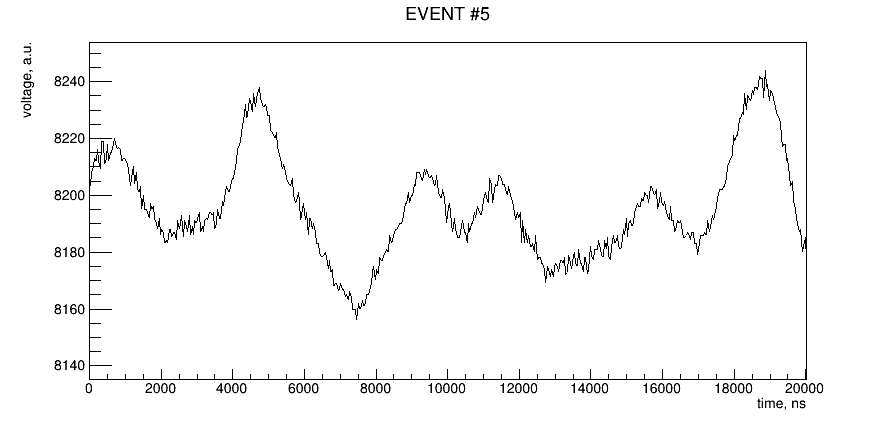

In [33]:
ch=[]
vl=[]
idx = 0
EVENT_NUM = 5
for val in dataset[EVENT_NUM]:
    ch.append( 20. + 40.*idx )
    vl.append( val )
    idx += 1
gr = makeGraph(ch,vl)
gr.SetTitle("EVENT #" + str(EVENT_NUM))
gr.GetXaxis().SetTitle("time, ns")
gr.GetXaxis().SetRangeUser(0,20000)
gr.GetYaxis().SetTitle("voltage, a.u.")
gr.Draw("AL")
canv.Draw()

In [20]:
datos = []
for evt_fft in fftset :
    datos.append( np.abs( evt_fft[16] ) / N_CHANNELS )
import statistics as stat
print("mean  = " + str(stat.mean(datos)))
print("stdev = " + str(stat.stdev(datos)))

mean  = 1.9481316999414537
stdev = 1.0062767389433034


Warning in <TROOT::Append>: Replacing existing TH1: h_abs (Potential memory leak).


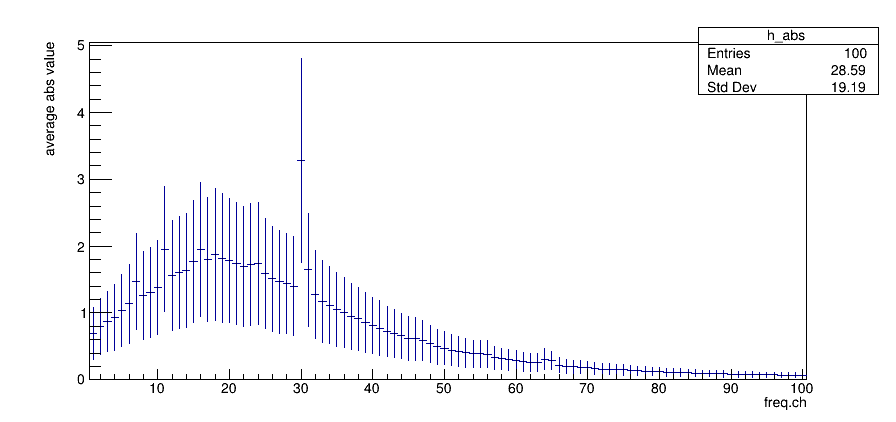

In [22]:
LEN_DRAW = 100
h_abs = ROOT.TH1F("h_abs",";freq.ch;average abs value",LEN_DRAW,0.5,LEN_DRAW+0.5)
for chan in range(1,LEN_DRAW+1):
    datos = []
    for evt_fft in fftset :
        datos.append( np.abs( evt_fft[chan] ) /N_CHANNELS )
    h_abs[chan] = VE ( stat.mean(datos), stat.stdev(datos)**2 )
h_abs.Draw()
canv.Draw()

In [31]:
1./(len(dataset[5])*40.*1e-9/3.)
#LEN_DRAW = 100
#h_abs2 = ROOT.TH1F("h_abs",";freq., Hz;average abs value",LEN_DRAW,0.5,LEN_DRAW+0.5)
#for chan in range(1,LEN_DRAW+1):
#    datos = []
#    for evt_fft in fftset :
#        datos.append( np.abs( evt_fft[chan] ) /N_CHANNELS )
#    h_abs2[chan] = VE ( stat.mean(datos), stat.stdev(datos)**2 )
#h_abs2.Draw()
#canv.Draw()

27860.326894502225

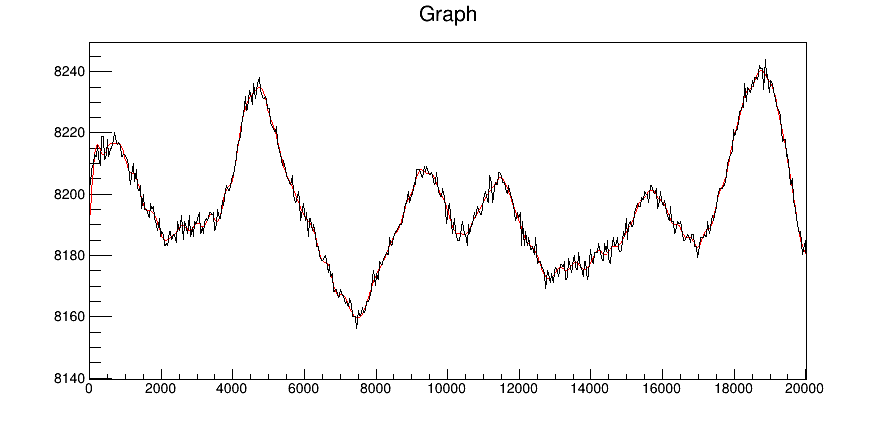

In [48]:
fh=[]
fq=[]
idx = 0
CUT=300
EVENT_NUM = 5
for val in fftset[EVENT_NUM]:
    if idx<CUT or idx>(len(dataset[5])-CUT):
        fh.append( 0.001/(len(dataset[EVENT_NUM])*40.*1e-9)*idx )
        fq.append( val )
    else:
        fq.append(0.)
    idx += 1
val = ifft(np.array(fq))
gf = makeGraph(ch,list(val))
gf.GetXaxis().SetRangeUser(0,20000)
gf.SetLineColor(2)
gf.Draw("AL")
gr.Draw("same L")
canv.Draw()